In [1]:
# First write up / program your algorithm using the library tools
# See examples/nearest_neighbors.py for a complete example (a k-nearest neighbors classifier)

In [2]:
# # To make use of your estimator, follow the following pipeline:
# # 1. Read in a data set that is appropriate for your estimator's task
from mlcv.datasets import fetcher

# In this case we implemented a classification algorithm, 
# so we use a data set with categorical targets (classes)
X, y = fetcher.load('iris')

In [3]:
# X are our data points and y are the targets (class labels)
# Let's see how the first 5 points look like
X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [4]:
# And the first 5 labels
y[:5]

array([0, 0, 0, 0, 0])

In [5]:
# It is a good idea to shuffle our data, so that our estimator does not just memorize the order of the targets
# This would not happen for this particular algorithm (k-nearest neighbors), 
# but could happen for many other algorithms. 

In [6]:
from sklearn.utils import shuffle

# Now it is a good time to specify a seed for all operations that rely on random numbers.
# You can use the same seed to reproduce the same random numbers (to repeat your experiments).
seed = 42
X, y = shuffle(X, y, random_state=seed)

In [7]:
# Let's check the first 5 labels now
y[:5]

array([1, 0, 2, 1, 1])

In [8]:
# # 2. Train-Test split
# Now split your data in a training set (to fit your model) and a testing set (to evaluate your model).
from sklearn.model_selection import train_test_split

# Here we use 70% of the data as training data and the rest for testing.
# Look up what `stratify` does. Is it important?
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=seed)

/home/johny/projects/scikit-learn/sklearn/model_selection/_split.py:2017: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
# # 3. Data pre-processing
# You should consider what kind of pre-processing might be useful or crucial **for your estimator**.
# For instance, you might want to make your data have zero mean (mean centering).
# Or in a binary classification problem, you might want to make your targets be either -1 or 1.
# Note that whatever pre-processing you perform on your training set, 
# the exact same pre-processing must be applied to your testing set too.

In [10]:
# # 4. Instantiate your model with the necessary parameters

# Here we import an example of an estimator, but you should use your own file(s).
from examples.nearest_neighbors import KNNClassifier

# Pass any parameters you choose to your model's constructor
knn = KNNClassifier(k=3)

# See the model parameters (some might be set by default)
print(knn)

KNNClassifier(k=3, metric='euclidean')


In [11]:
# # 5. Train your model (This is where the "learning" takes place.)
knn.fit(X_train, y_train)

KNNClassifier(k=3, metric='euclidean')

In [12]:
# # 6. Evaluate your model on the testing set
# Predict with the trained model
y_pred = knn.predict(X_test)

# Compute a score based on the discrepancies between your model's predictions and the groundtruth.
test_acc = knn.score(y_pred, y_test)
print('3-nearest neighbors test accuracy: {:5.2f}%.'.format(test_acc*100))

3-nearest neighbors test accuracy: 97.78%.


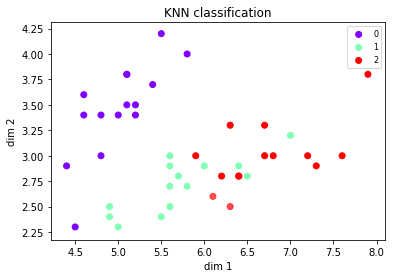

In [13]:
# # 7. Possibly visualize something your model learned
from matplotlib import pyplot as plt

# Here we visualize the testing set. 
# Each testing sample gets colored according to its highest predicted class probability
knn.visualize(X_test, proba=knn.predict_proba(X_test))
plt.show()